In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten

2022-09-15 18:59:13.311567: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-15 18:59:13.311625: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [1]:
!pwd

/home/hassib12/code/hassib12/FoodSecurityForecaster/notebooks


In [22]:
data = pd.read_csv('../raw_data/Crop yield data/COUNTY_level_annual/SSD processed.csv')
data= data.sort_values(by=['County', 'Year']).reset_index()
data = data[['County', 'Year', 'Crop', 'Yield']]
data.head(129)

,County,Year,Crop,Yield
0,Akobo,2010,corn,0.560153
1,Akobo,2011,corn,0.799974
2,Akobo,2012,corn,0.800080
3,Akobo,2013,corn,0.800004
4,Akobo,2014,corn,0.560153
...,...,...,...,...
124,Malut,2014,corn,0.800076
125,Malut,2015,corn,0.799773
126,Malut,2016,corn,0.799861
127,Malut,2017,corn,0.800004


In [24]:
data.to_csv('../raw_data/Crop yield data/COUNTY_level_annual/SSD_processed_15sept.csv')

In [23]:
data['County'].value_counts()

Akobo            8
Malut            8
Yambio           8
Wau              8
Tonj             8
Tombura          8
Terkaka          8
Rumbek           8
Raja             8
Rabkona          8
Pibor            8
Nahr Yei         8
Mundri           8
Meridi           8
Magwi            8
Al Leiri         8
Kapoeta          8
Kajo Kaii        8
Gogrial          8
Fashooda         8
Faring           8
Bor              8
Baleit           8
Bahr al Jabal    8
Aweil Centre     8
Al Renk          8
Al Mayom         8
Al Mabien        8
Yerol            8
Name: County, dtype: int64

In [24]:
data['Region2'].nunique()

79

In [26]:
data['Region2'].shape

(632,)

In [29]:
data['Region2'].value_counts()

juba             8
luakpinynasir    8
renk             8
panyikang        8
melut            8
                ..
awerial          8
uror             8
twic east        8
pochalla         8
yambio           8
Name: Region2, Length: 79, dtype: int64

In [31]:
data.isnull().sum()

State           0
County          0
Year            0
Crop            0
Area planted    0
Production      0
Yield           0
Region1         0
Region2         0
dtype: int64

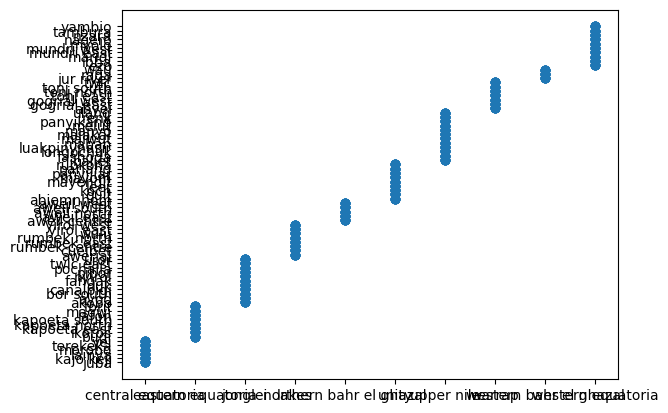

In [36]:
plt.scatter(data['Region1'], data['Region2'])